In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
#jtplot.style()
jtplot.reset()

In [2]:
### lists and dicts to help clear dataframes
#list of columns i want to keep
const_cols = ["Province/State", "Country", "Country/Region", "Date last updated", "Last Update", "Confirmed", "Recovered", "Deaths"]
#dict of column names to change
column_names = {"Country": "Country/Region", "Date last updated": "Last Update"}
#dict of columns and values to put in NaNs
fillna_values = {'Province/State': "", "Country/Region": "", "Confirmed": 0, "Recovered": 0, "Deaths":0}

In [3]:
def read_time_series_csv(url, save, file_name):
    
    df_ts = pd.read_csv(url)
    
    #df_ts = df_ts.dropna(axis=0, how='all')
    #df_ts = df_ts.dropna(axis=1, how='all')

    df_text = df_ts[df_ts.columns[0:2]]
    df_text = df_text.fillna(value = '')
    
    df_val = df_ts[df_ts.columns[2:len(df_ts.columns)]]
    df_val = df_val.fillna(value = 0)
    
    df_ts = pd.concat([df_text,df_val],axis=1)
    
    if save == True:
        writer = pd.ExcelWriter(file_name, engine='xlsxwriter')

        df_ts.to_excel(writer, index=False)

        writer.save()

    return df_ts

In [4]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"

In [5]:
df_confirmed = read_time_series_csv(url_confirmed, True, "COVID19-Confirmed.xlsx")
df_deaths = read_time_series_csv(url_deaths, True, "COVID19-Deaths.xlsx")
df_recovered = read_time_series_csv(url_recovered, True, "COVID19-Recovered.xlsx")

In [6]:
print(df_confirmed)

                                  Province/State   Country/Region       Lat  \
0                                          Anhui   Mainland China  31.82571   
1                                        Beijing   Mainland China  40.18238   
2                                      Chongqing   Mainland China  30.05718   
3                                         Fujian   Mainland China  26.07783   
4                                          Gansu   Mainland China  36.06110   
5                                      Guangdong   Mainland China  23.33841   
6                                        Guangxi   Mainland China  23.82908   
7                                        Guizhou   Mainland China  26.81536   
8                                         Hainan   Mainland China  19.19673   
9                                          Hebei   Mainland China  38.04280   
10                                  Heilongjiang   Mainland China  47.86200   
11                                         Henan   M

In [7]:
print("Shape of df_confirmed: {}".format(df_confirmed.shape))
print("Shape of df_deaths: {}".format(df_deaths.shape))
print("Shape of df_recovered: {}".format(df_recovered.shape))

#printing whole df
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df_confirmed)

Shape of df_confirmed: (101, 40)
Shape of df_deaths: (101, 40)
Shape of df_recovered: (101, 40)


In [8]:
china_confirmed = df_confirmed[df_confirmed['Country/Region']=="Mainland China"].iloc[:,4:].sum(axis=0)
china_deaths = df_deaths[df_deaths['Country/Region']=="Mainland China"].iloc[:,4:].sum(axis=0)
china_recovered = df_recovered[df_recovered['Country/Region']=="Mainland China"].iloc[:,4:].sum(axis=0)

print(china_confirmed)
#print(china_recovered_series)
#print(china_deaths_series)

1/22/20      547
1/23/20      639
1/24/20      916
1/25/20     1399
1/26/20     2062
1/27/20     2863
1/28/20     5494
1/29/20     6070
1/30/20     8124
1/31/20     9783
2/1/20     11871
2/2/20     16607
2/3/20     19693
2/4/20     23680
2/5/20     27409
2/6/20     30553
2/7/20     34075
2/8/20     36778
2/9/20     39790
2/10/20    42306
2/11/20    44327
2/12/20    44699
2/13/20    59832
2/14/20    66292
2/15/20    68347
2/16/20    70446
2/17/20    72364
2/18/20    74139
2/19/20    74546
2/20/20    74999
2/21/20    75472
2/22/20    76922
2/23/20    76938
2/24/20    77152
2/25/20    77660
2/26/20    78065
dtype: int64


In [9]:
dates_confirmed = china_confirmed.index.values
dates_deaths = china_deaths.index.values
dates_recovered = china_recovered.index.values

print(dates_confirmed)
#print(dates_1)
#print(dates_2)

dates_datetime_confirmed = pd.to_datetime(dates_confirmed, infer_datetime_format=True)
dates_datetime_deaths = pd.to_datetime(dates_deaths, infer_datetime_format=True)
dates_datetime_recovered = pd.to_datetime(dates_recovered, infer_datetime_format=True)

print(dates_datetime_confirmed)


['1/22/20' '1/23/20' '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20'
 '1/29/20' '1/30/20' '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20'
 '2/5/20' '2/6/20' '2/7/20' '2/8/20' '2/9/20' '2/10/20' '2/11/20'
 '2/12/20' '2/13/20' '2/14/20' '2/15/20' '2/16/20' '2/17/20' '2/18/20'
 '2/19/20' '2/20/20' '2/21/20' '2/22/20' '2/23/20' '2/24/20' '2/25/20'
 '2/26/20']
DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26'],
  

In [10]:
#something for converting datetime for x axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

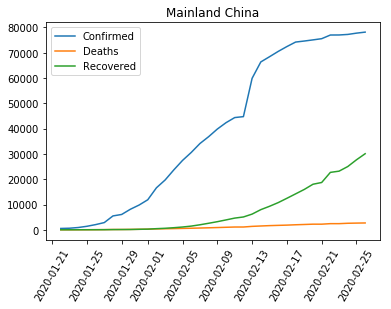

In [11]:
plt.plot(dates_datetime_confirmed, china_confirmed, dates_datetime_deaths, china_deaths, dates_datetime_recovered, china_recovered)
plt.xticks(rotation=60)
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.title("Mainland China")
plt.savefig("img/china.png",bbox_inches='tight')

In [12]:
countries_ts = df_confirmed['Country/Region'].unique()
print(len(countries_ts))
print(countries_ts)

49
['Mainland China' 'Thailand' 'Japan' 'South Korea' 'Taiwan' 'US' 'Macau'
 'Hong Kong' 'Singapore' 'Vietnam' 'France' 'Nepal' 'Malaysia' 'Canada'
 'Australia' 'Cambodia' 'Sri Lanka' 'Germany' 'Finland'
 'United Arab Emirates' 'Philippines' 'India' 'Italy' 'UK' 'Russia'
 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt' 'Iran' 'Lebanon' 'Iraq'
 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria' 'Croatia' 'Switzerland'
 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania']


In [13]:
#for country in countries_ts:
    #plt.plot(dates_datetime, ts_df_list[0][ts_df_list[0]['Country/Region']==country].iloc[:,5:].sum(axis=0))
    #plt.show()

In [14]:
#math for using floor
import math

12


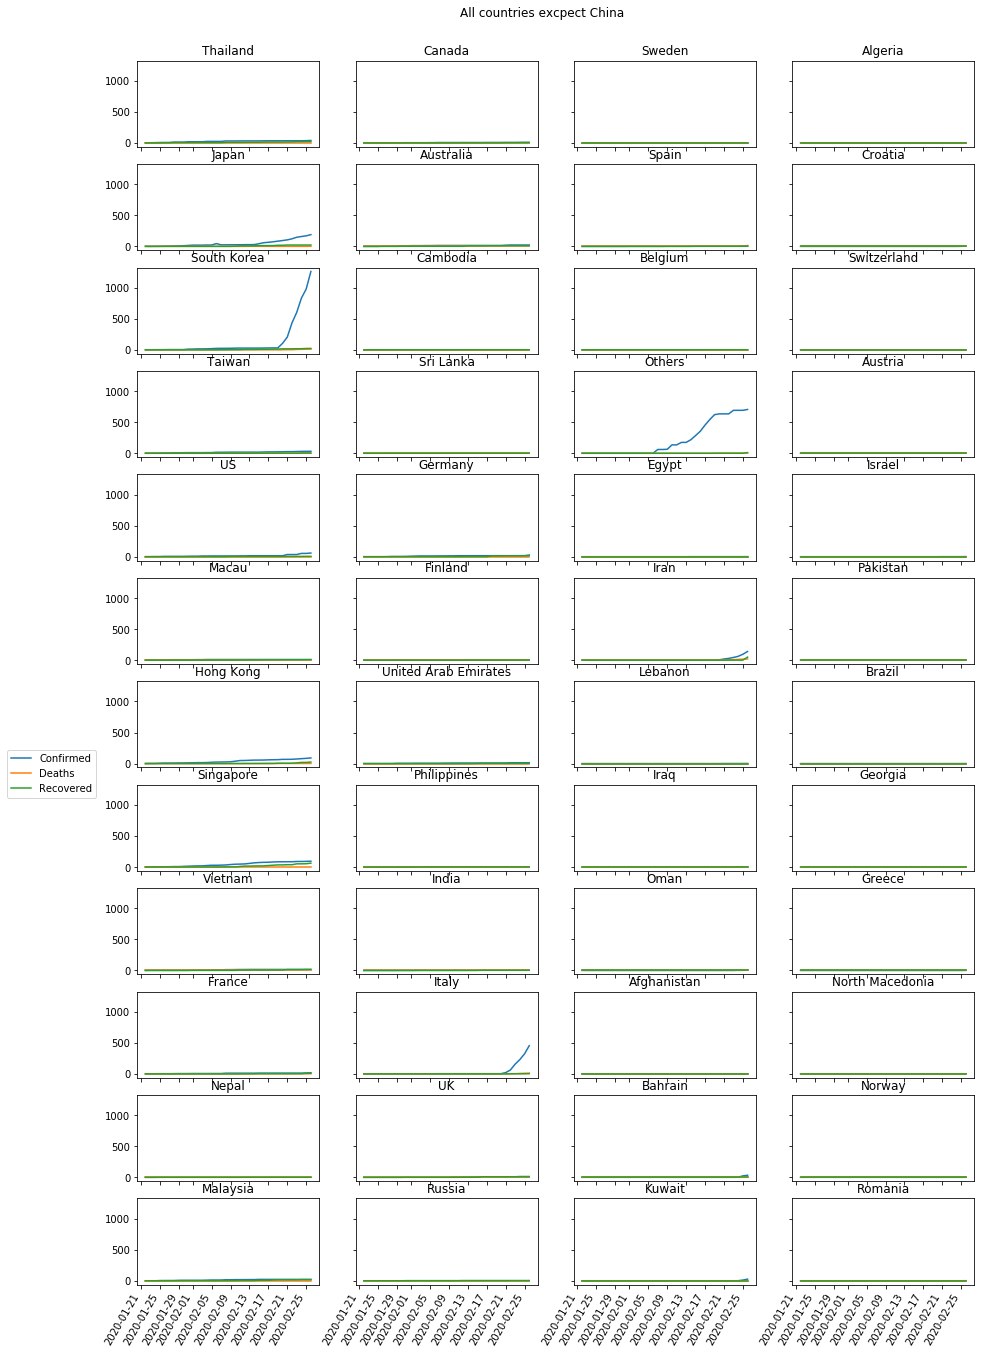

In [15]:
#country_confirmed = df_confirmed[df_confirmed['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
#dates_confirmed = country_confirmed.index.values
#dates_datetime_confirmed = pd.to_datetime(dates_confirmed, infer_datetime_format=True)

#country_deaths = df_deaths[df_deaths['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
#dates_deaths = country_deaths.index.values
#dates_datetime_deaths = pd.to_datetime(dates_deaths, infer_datetime_format=True)

#country_recovered = df_recovered[df_recovered['Country/Region']==countries_ts[0]].iloc[:,5:].sum(axis=0)
#dates_recovered = country_recovered.index.values
#dates_datetime_recovered = pd.to_datetime(dates_recovered, infer_datetime_format=True)
    
plots_in_row = 4
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((len(countries_ts)-1)/plots_in_row)

print(plots_in_col)

fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, 25), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_ts[1:]:
    
    axs[i][j].plot(dates_datetime_confirmed,df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths,df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered,df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('All countries excpect China',y=0.91)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0., 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest.png",bbox_inches='tight')

In [16]:
#list of number of confirmed cases from last column
confirmed_country = []
row = len(dates_confirmed)-1
for country in countries_ts:
    confirmed_country.append(df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0)[row])

print(confirmed_country)

[78065, 40, 189, 1261, 32, 59, 10, 91, 93, 16, 18, 1, 22, 11, 22, 1, 1, 27, 2, 13, 3, 3, 453, 13, 2, 2, 13, 1, 705, 1, 139, 2, 5, 4, 1, 33, 26, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1]


In [52]:
limit = 100

In [53]:
dictionary = {"Country":countries_ts ,"Confirmed":confirmed_country}

countries_last_date = pd.DataFrame(dictionary)
# print(countries_last_date)

if_over_limit = countries_last_date.apply(lambda x: True if x['Confirmed'] > limit else False , axis=1)

numOfRows = len(if_over_limit[if_over_limit == True].index)
 
print('Number of countries with over {} confirmed cases: {}'.format(limit,numOfRows))

Number of countries with over 100 confirmed cases: 6


In [54]:
#
indexTrue = if_over_limit[ if_over_limit == False ].index
indexFalse = if_over_limit[ if_over_limit == True ].index
print(indexTrue)
print(indexFalse)

#copying to not change original df
countries_over_limit = countries_last_date.copy()
countries_under_limit = countries_last_date.copy()

countries_over_limit.drop(indexTrue, inplace=True, axis=0)
countries_under_limit.drop(indexFalse, inplace=True, axis=0)

#print(countries_over_limit)
#print(countries_under_limit)

Int64Index([ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39,
            40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')
Int64Index([0, 2, 3, 22, 28, 30], dtype='int64')


In [55]:
#print(countries_last_date)

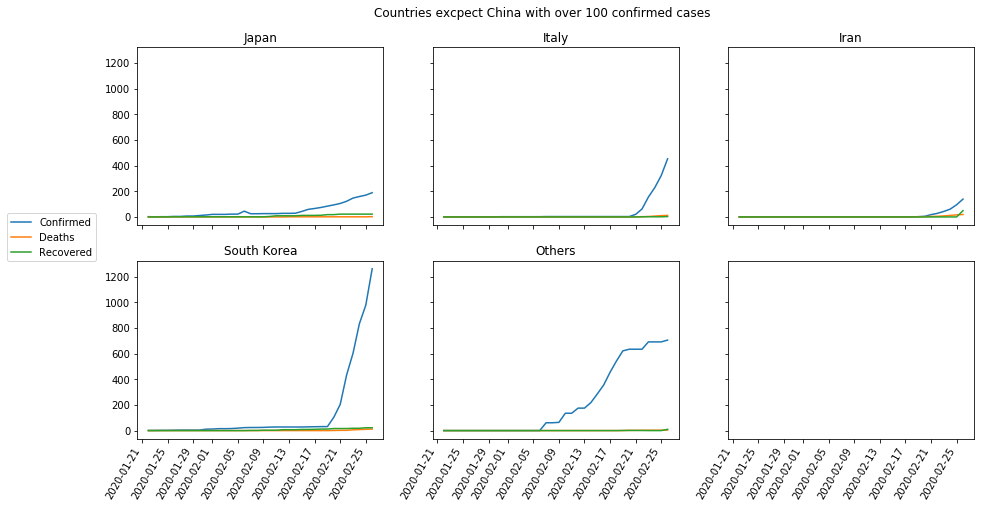

In [56]:
###plot for countries with confirmed cases over limit
plots_in_row = 3
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((numOfRows-1)/plots_in_row)

fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(15, plots_in_col*4), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_over_limit["Country"][1:]:
    #print(country)
    axs[i][j].plot(dates_datetime_confirmed, df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths, df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered, df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('Countries excpect China with over {} confirmed cases'.format(limit),y=0.95)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0.1, 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest_over_limit.png",bbox_inches='tight')

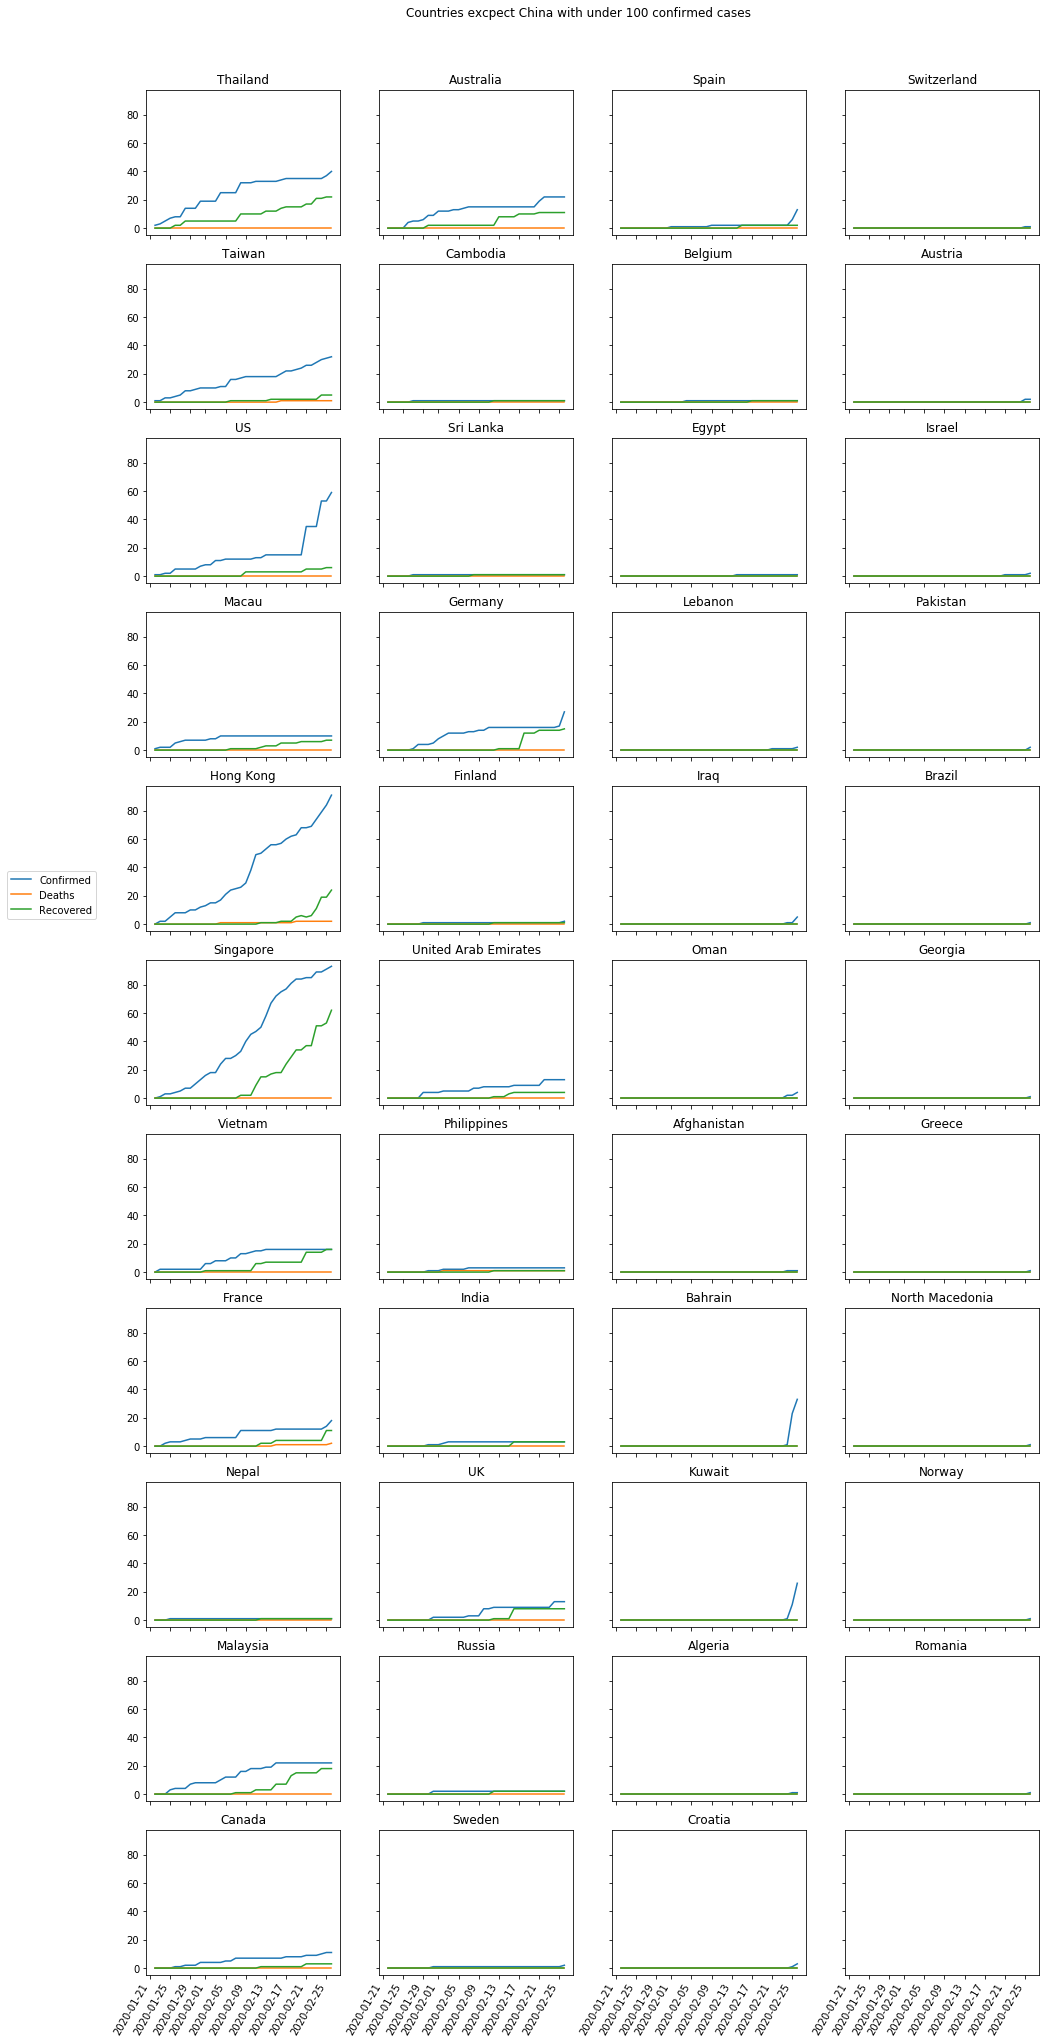

In [57]:
###plot for countries with confirmed cases over limit
plots_in_row = 4
#define how many rows on how many countries in list without china
plots_in_col = math.ceil((len(countries_ts)-numOfRows)/plots_in_row)
#print(plots_in_col)
fig, axs = plt.subplots(plots_in_col, plots_in_row, figsize=(16, plots_in_col*3.5), sharey=True, sharex=True)
fig.autofmt_xdate(rotation=60)

axs0 = axs.shape[0]
axs1 = axs.shape[1]

i = 0
j = 0

for country in countries_under_limit["Country"]:
    #print(country)
    axs[i][j].plot(dates_datetime_confirmed, df_confirmed[df_confirmed['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_deaths, df_deaths[df_deaths['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].plot(dates_datetime_recovered, df_recovered[df_recovered['Country/Region']==country].iloc[:,4:].sum(axis=0))
    axs[i][j].set_title(country)
    #axs[i][j].set_xticklabels(rotation=90)
    i = i + 1
    if i==plots_in_col:
        i = 0
        j = j + 1
        if j==plots_in_row:
            j = 0
fig.suptitle('Countries excpect China with under {} confirmed cases'.format(limit),y=0.91)
fig.legend(['Confirmed', 'Deaths', 'Recovered'],loc='upper left', bbox_to_anchor=(0., 0.1, 0.5, 0.5),bbox_transform=plt.gcf().transFigure)
plt.savefig("img/rest_under_limit.png",bbox_inches='tight')

In [39]:
#df_confirmed

In [24]:
def make_df_colCountry_rowValues(df, countries_ts):
    #new df - columns will be countries, index is date
    df_colCountry_rowConfirmed = pd.DataFrame()
    #print(df_colCountry_rowConfirmed)
    for i, country in enumerate(countries_ts,0):
        column = df[df['Country/Region']==country].iloc[:,4:].sum(axis=0)
        df_colCountry_rowConfirmed.insert(i, country, column)
    print(df_colCountry_rowConfirmed.tail(3))
    return df_colCountry_rowConfirmed

In [25]:
df_colCountry_rowConfirmed = make_df_colCountry_rowValues(df_confirmed, countries_ts)
df_colCountry_rowDeaths = make_df_colCountry_rowValues(df_deaths, countries_ts)
df_colCountry_rowRecovered = make_df_colCountry_rowValues(df_recovered, countries_ts)

         Mainland China  Thailand  Japan  South Korea  Taiwan  US  Macau  \
2/24/20           77152        35    159          833      30  53     10   
2/25/20           77660        37    170          977      31  53     10   
2/26/20           78065        40    189         1261      32  59     10   

         Hong Kong  Singapore  Vietnam  ...  Switzerland  Austria  Israel  \
2/24/20         79         89       16  ...            0        0       1   
2/25/20         84         91       16  ...            1        2       1   
2/26/20         91         93       16  ...            1        2       2   

         Pakistan  Brazil  Georgia  Greece  North Macedonia  Norway  Romania  
2/24/20         0       0        0       0                0       0        0  
2/25/20         0       0        0       0                0       0        0  
2/26/20         2       1        1       1                1       1        1  

[3 rows x 49 columns]
         Mainland China  Thailand  Japan  South

In [26]:
#przyrosty względne
rel_change_confirmed = df_colCountry_rowConfirmed.pct_change()

In [27]:
abs_change_confirmed = df_colCountry_rowConfirmed.diff()
abs_change_deaths = df_colCountry_rowDeaths.diff()
abs_change_recovered = df_colCountry_rowRecovered.diff()
print(abs_change_confirmed.tail(3))

         Mainland China  Thailand  Japan  South Korea  Taiwan    US  Macau  \
2/24/20           214.0       0.0   12.0        231.0     2.0  18.0    0.0   
2/25/20           508.0       2.0   11.0        144.0     1.0   0.0    0.0   
2/26/20           405.0       3.0   19.0        284.0     1.0   6.0    0.0   

         Hong Kong  Singapore  Vietnam  ...  Switzerland  Austria  Israel  \
2/24/20        5.0        0.0      0.0  ...          0.0      0.0     0.0   
2/25/20        5.0        2.0      0.0  ...          1.0      2.0     0.0   
2/26/20        7.0        2.0      0.0  ...          0.0      0.0     1.0   

         Pakistan  Brazil  Georgia  Greece  North Macedonia  Norway  Romania  
2/24/20       0.0     0.0      0.0     0.0              0.0     0.0      0.0  
2/25/20       0.0     0.0      0.0     0.0              0.0     0.0      0.0  
2/26/20       2.0     1.0      1.0     1.0              1.0     1.0      1.0  

[3 rows x 49 columns]


In [28]:
#plt.plot(df_colCountry_rowConfirmed["Mainland China"].diff())

In [29]:
daily_abs_change_confirmed_all = abs_change_confirmed.sum(axis=1)
daily_abs_change_deaths_all = abs_change_deaths.sum(axis=1)
daily_abs_change_recovered_all = abs_change_recovered.sum(axis=1)

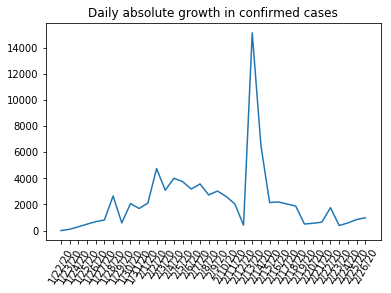

In [30]:
plt.plot(dates_confirmed, daily_abs_change_confirmed_all)
plt.xticks(rotation=60)
#plt.legend(['Absolute growth in confirmed cases'])
plt.title("Daily absolute growth in confirmed cases")
plt.savefig("img/abs_growth_confirmed.png",bbox_inches='tight')

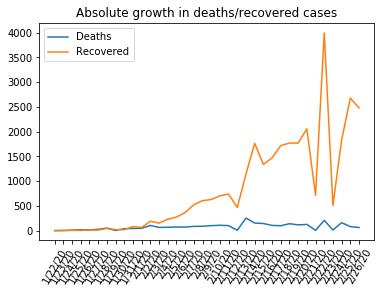

In [31]:
plt.plot(dates_confirmed, daily_abs_change_deaths_all, dates_confirmed,daily_abs_change_recovered_all)
plt.xticks(rotation=60)
plt.legend(['Deaths', 'Recovered'])
plt.title("Absolute growth in deaths/recovered cases")
plt.savefig("img/abs_growth_deaths_recovered.png",bbox_inches='tight')